Matplotlib global setup for quantumarticle completed.


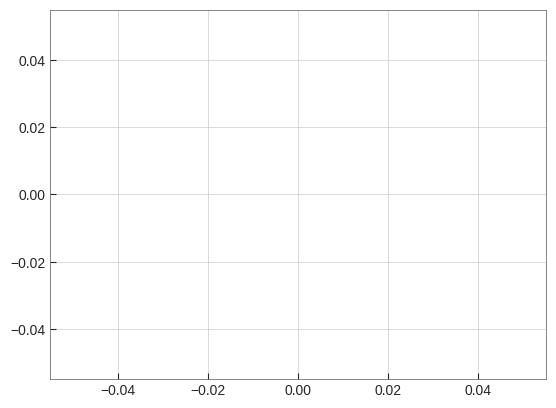

In [3]:
import numpy             as     np
import matplotlib        as     mpl
import matplotlib.pyplot as     plt
from   matplotlib        import rc
from   cycler            import cycler

_widths = {
    # a4paper columnwidth = 426.79135 pt = 5.93 in
    # letterpaper columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper columnwidth = 231.84843 pt = 3.22 in
    # letterpaper columnwidth = 240.24199 pt = 3.34 in
    'twocolumn': {
        'a4paper' : 3.22,
        'letterpaper' : 3.34
    }
}

_wide_widths = {
    # a4paper wide columnwidth = 426.79135 pt = 5.93 in
    # letterpaper wide columnwidth = 443.57848 pt = 6.16 in
    'onecolumn': {
        'a4paper' : 5.93,
        'letterpaper' : 6.16
    },
    # a4paper wide linewidth = 483.69687 pt = 6.72 in
    # letterpaper wide linewidth = 500.48400 pt = 6.95 in
    'twocolumn': {
        'a4paper' : 6.72,
        'letterpaper' : 6.95
    }
}

_fontsizes = {
    10 : {
        'tiny' : 5,
        'scriptsize' : 7,
        'footnotesize' : 8, 
        'titlesize' : 10,
        'small' : 9, 
        'normalsize' : 10,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' : 20,
        'Huge' : 25
    },
    11 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 9, 
        'titlesize' : 10,
        'small' : 10, 
        'normalsize' : 11,
        'large' : 12, 
        'Large' : 14, 
        'LARGE' : 17,
        'huge' :  20,
        'Huge' :  25
    },
    12 : {
        'tiny' : 6,
        'scriptsize' : 8,
        'footnotesize' : 10,
        'titlesize' : 10, 
        'small' : 11, 
        'normalsize' : 12,
        'large' : 14, 
        'Large' : 17, 
        'LARGE' : 20,
        'huge' :  25,
        'Huge' :  25
    }
}

_width         = 1
_wide_width    = 1
_quantumviolet = '#53257F'
_quantumgray   = '#555555'

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     columns : string = ('onecolumn' | 'twocolumn')
#         the columns you used to set up your quantumarticle, 
#         defaults to 'twocolumn'
#
#     paper : string = ('a4paper' | 'letterpaper')
#         the paper size you used to set up your quantumarticle,
#         defaults to 'a4paper'
#
#     fontsize : int = (10 | 11 | 12)
#         the fontsize you used to set up your quantumarticle as int
#
#     (returns) : dict
#         parameters that can be used for plot adjustments

def global_setup(columns = 'twocolumn', paper = 'a4paper', fontsize = 10):
    plt.rcdefaults()
        
    # Seaborn white is a good base style
    plt.style.use(['seaborn-v0_8-whitegrid', './quantum-plots.mplstyle'])
    
    try:        
        # This hackery is necessary so that jupyther shows the plots
        mpl.use("pgf")
        %matplotlib inline
        plt.plot()
        mpl.use("pgf")
    except:
        print('Call to matplotlib.use had no effect')
        
    mpl.interactive(False)
    
    # Now prepare the styling that depends on the settings of the document
    
    global _width 
    _width = _widths[columns][paper]
    
    global _wide_width 
    _wide_width = _wide_widths[columns][paper]
    
    # Use the default fontsize scaling of LaTeX
    global _fontsizes
    fontsizes = _fontsizes[fontsize]
    
    plt.rcParams['axes.labelsize'] = fontsizes['small']
    plt.rcParams['axes.titlesize'] = fontsizes['large']
    plt.rcParams['xtick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['ytick.labelsize'] = fontsizes['footnotesize']
    plt.rcParams['font.size'] = fontsizes['small']
    plt.rcParams['figure.titlesize'] = fontsizes['small']
    
    return {
            'fontsizes' : fontsizes,
            'colors' : {
                'quantumviolet' : _quantumviolet,
                'quantumgray' : _quantumgray
            }
        }
    

# Sets up the plot with the fitting arguments so that the font sizes of the plot
# and the font sizes of the document are well aligned
#
#     aspect_ratio : float
#         the aspect ratio (width/height) of your plot
#         defaults to the golden ratio
#
#     width_ratio : float in [0, 1]
#         the width of your plot when you insert it into the document, e.g.
#         .8 of the regular width
#         defaults to 1.0
#
#     wide : bool 
#         indicates if the figures spans two columns in twocolumn mode, i.e.
#         when the figure* environment is used, has no effect in onecolumn mode 
#         defaults to False
#
#     (returns) : matplotlib figure object
#         the initialized figure object

def plot_setup(aspect_ratio = 1/1.62, width_ratio = 1.0, wide = False):
    width = (_wide_width if wide else _width) * width_ratio
    height = width * aspect_ratio
           
    return plt.figure(figsize=(width,height), dpi=120, facecolor='white')
    
global_setup()
print("Matplotlib global setup for quantumarticle completed.")

In [4]:
from dataclasses import dataclass
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.lines import Line2D
from scipy.stats import norm
from scipy.optimize import curve_fit
from scipy.ndimage import uniform_filter1d

# Parameters for plotting
base_decoder_colors = {
    'uf': [
        "#6baed6", "#4292c6", "#3182bd", "#1f77b4", "#2171b5",
        "#08519c", "#08306b", "#08519c", "#08306b", "#08306b",
    ],
    'clayg': [
        "#fdae6b", "#ffbb78", "#ff8c00", "#fd8d3c", "#ffa726",
        "#f16913", "#ff7f0e", "#d95f02", "#d94801", "#a63603",
    ],
    'sl_clayg': [
        "#31a354", "#74c476", "#238b45", "#31a354", "#74c476",
        "#006d2c", "#00441b", "#006d2c", "#00441b", "#006d2c",
    ],
    'other': [
        "#e377c2", "#d62728", "#ff9896", "#c51b7d", "#8c564b",
        "#e377c2", "#d62728", "#ff9896", "#c51b7d", "#8c564b",
    ]
}

def decoder_colors(decoder):
    # Regex to extract base, lifetime, and stop_early
    pattern = r'^(uf|clayg|sl_clayg)(?:_(stop_early|no_stop_early))?(?:_lifetime_([0-9.]+))?$'
    match = re.match(pattern, decoder)
    if not match:
        return base_decoder_colors['other']  # Return 'other' colors if no match
    base, stop_early, lifetime = match.groups()
    colors = base_decoder_colors.get(base, base_decoder_colors['other'])
    if stop_early == 'stop_early':
        print("MAKING DARKER")
        # make colors darker for stop_early
        # make each color darker by scaling RGB values
        def darken(hex_color, factor=0.2):
            hex_color = hex_color.lstrip('#')
            rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            dark_rgb = tuple(int(c * factor) for c in rgb)
            return '#{:02x}{:02x}{:02x}'.format(*dark_rgb)
        colors = [darken(c) for c in colors]
    if lifetime:
        factor = float(lifetime)
        # make colors lighter for lifetime
        def lighten(hex_color, factor=1.3):
            hex_color = hex_color.lstrip('#')
            rgb = tuple(int(hex_color[i:i+2], 16) for i in (0, 2, 4))
            light_rgb = tuple(min(int(c * factor), 255) for c in rgb)
            return '#{:02x}{:02x}{:02x}'.format(*light_rgb)
        colors = [lighten(c, factor=0.15*factor) for c in colors]
    return colors

base_decoder_names = {
    'uf': 'UF',
    'clayg': 'ClAYG',
    'sl_clayg': 'Single Layer ClAYG',
}

# Function to get decoder display name
def decoder_name(decoder):
    # Regex to extract base, lifetime, and stop_early
    pattern = r'^(uf|clayg|sl_clayg)(?:_(stop_early|no_stop_early))?(?:_lifetime_([0-9.]+))?$'
    match = re.match(pattern, decoder)
    if not match:
        return decoder  # Return as is if no match
    base, stop_early, lifetime = match.groups()
    name = base_decoder_names.get(base, base)
    if lifetime:
        name += f"({lifetime})"
    if stop_early == 'stop_early':
        name += " (stop early)"
    elif stop_early == 'no_stop_early':
        name += " (no stop early)"
    return name


In [5]:
@dataclass
class Data:
    results: pd.DataFrame
    steps: pd.DataFrame

def collect_data(base_dirs, plot_ids) -> Data:
    results_rows = []
    steps_rows = []

    # Precompiled regex patterns
    results_file_pattern = re.compile(
        r"^(?P<decoder>(\w+(?:_\w+)*(?:_\d+(?:\.\d+)*)?))_d=(?P<distance>\d+)"
        r"(?:_(?:idlingtimeconstant|N)=(?P<N>\d+(?:\.\d+)?))?\.txt$"
    )
    steps_file_pattern = re.compile(r"([\w\._]+)_d=(\d+)_p=([\d\.]+)\.txt")

    # Collect all relevant plot folders
    plot_folders = []
    for base_dir in base_dirs:
        with os.scandir(base_dir) as it:
            for entry in it:
                if entry.is_dir():
                    if not plot_ids or any(entry.name.startswith(f"{pid}") for pid in plot_ids):
                        plot_folders.append(entry.path)

    # Process each folder
    for folder in plot_folders:
        # Process results files
        results_dir = os.path.join(folder, "results")
        if os.path.isdir(results_dir):
            with os.scandir(results_dir) as it:
                for entry in it:
                    if entry.is_file() and entry.name.endswith(".txt"):
                        match = results_file_pattern.match(entry.name)
                        if not match:
                            continue

                        decoder = match["decoder"]
                        distance = int(match["distance"])
                        N = float(match["N"]) if match["N"] else np.nan

                        # Read file into a DataFrame
                        df = pd.read_csv(
                            entry.path, sep=r"\s+", names=["p", "l", "n"],
                            comment="p", engine="python"
                        )
                        df["decoder"] = decoder
                        df["distance"] = distance
                        df["N"] = N
                        results_rows.extend(df.to_dict("records"))

        # Process steps files
        steps_dir = os.path.join(folder, "steps")
        if os.path.isdir(steps_dir):
            with os.scandir(steps_dir) as it:
                for entry in it:
                    if entry.is_file() and entry.name.endswith(".txt"):
                        match = steps_file_pattern.match(entry.name)
                        if not match:
                            continue

                        decoder, distance, p = match.groups()
                        distance = int(distance)
                        p = float(p)

                        # Read step file line by line
                        with open(entry.path, "r") as f:
                            for line in f:
                                if line.strip():
                                    parts = line.strip().split()
                                    if len(parts) != 2:
                                        continue
                                    try:
                                        steps, occurences = map(float, parts)
                                        steps_rows.append({
                                            "decoder": decoder,
                                            "distance": distance,
                                            "p": p,
                                            "value": steps,
                                            "occurences": int(occurences),
                                        })
                                    except ValueError:
                                        print(f"Skipping invalid line: {line.strip()}")

    # Return results in a Data dataclass
    data = Data(
        results=pd.DataFrame(results_rows),
        steps=pd.DataFrame(steps_rows),
    )
    return data


/tmp/ipykernel_113131/146814406.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = data.results.groupby(['decoder', 'distance']).apply(


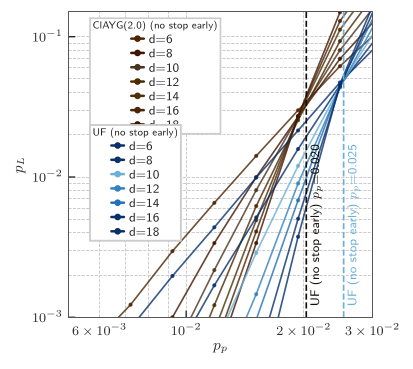

In [6]:
base_dirs = [
    "../data/ccluster/PAPER/results_threshold/",
]

data = collect_data(base_dirs, [])

data.results = data.results[data.results['l'] > 0]
data.results = data.results[data.results['decoder'].isin(['uf_no_stop_early', 'clayg_no_stop_early_lifetime_2.0'])]

if data.results.empty:
    raise ValueError("No data found for the specified decoders. Valid decoders are: " + ", ".join(data.results['decoder'].unique()))


results = data.results.groupby(['decoder', 'distance']).apply(
    lambda x: x.set_index('p')[['l', 'n']].apply(lambda row: (row['l'], row['n']), axis=1).to_dict()
)
results_dict = results.to_dict()

error_bars = False
plot_fit = False

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.3, wide=False)
ax = fig.add_subplot(1, 1, 1)

effective_distances = {}

# Group lines per decoder
grouped_lines = {}

for (decoder, distance), values in results.items():
    colors = decoder_colors(decoder)
    label = decoder_name(decoder)

    ps = list(values.keys())
    ls, ns = zip(*(values.values()))
    ls = np.array(ls, dtype=float)
    ns = np.array([n if n is not None and not np.isnan(n) else 200000 for n in ns], dtype=float)

    sorted_indices = np.argsort(ps)
    ps = np.array(ps)[sorted_indices]
    ls = ls[sorted_indices]
    ns = ns[sorted_indices]

    # Wilson score interval
    z = norm.ppf(1 - 0.05 / 2)
    sigma = 1 / (1 + z**2 / ns) * (ls + z/(2*ns)*(z + np.sqrt(4*ns*ls*(1-ls))+z**2))

    def power_law(x, a, b):
        return a * np.power(x, b)

    include_effective_distance_in_legend = False
    effective_distance = None
    try:
        if len(ps) >= 2:
            popt, _ = curve_fit(power_law, ps, ls, sigma=sigma, absolute_sigma=True)
            a, b = popt
            effective_distance = abs(b) * 2
            if plot_fit:
                p_fit = np.logspace(np.log10(min(ps)), np.log10(max(ps)), 100)
                l_fit = power_law(p_fit, *popt)
                ax.plot(p_fit, l_fit, '--', color=colors[distance % len(colors)], linewidth=1, alpha=0.7)
            effective_distances[(decoder, distance)] = effective_distance
    except Exception as e:
        print(f"Fit failed for {label} d={distance}: {e}")

    color = colors[distance % len(colors)]
    shortened_label = f"d={distance}"
    if include_effective_distance_in_legend:
        label += ", d"+ r"$_\mathrm{eff}$" +  f"={effective_distance:.2f}" if effective_distance else f"d={distance}"
    
    if error_bars:
        line = ax.errorbar(ps, ls, yerr=sigma, fmt='o-', color=color, markersize=1.5, 
                           label=label, capsize=1, linewidth=1, alpha=0.8)
    else:
        line, = ax.plot(ps, ls, 'o-', color=color, markersize=1.5, 
                        label=label, linewidth=1, alpha=0.8)

    grouped_lines.setdefault(label, []).append((line, shortened_label))

# === grouped sublegends ===
legend_x_offset = .05
for i, (dec_name, entries) in enumerate(grouped_lines.items()):
    legend_elements = [
        Line2D([0], [0], color=line.get_color() if not error_bars else line.lines[0].get_color(), lw=1.5, marker='o', label=label)
        for line, label in entries
    ]
    leg = ax.legend(
        handles=legend_elements,
        title=dec_name,
        loc='upper left',
        bbox_to_anchor=(legend_x_offset, 1.0-0.35*i),
        frameon=True,
        fontsize='small',
        handlelength=1.0,
        handletextpad=0.4,
        borderpad=0.2,
        labelspacing=0.25,
        ncol=1,
        title_fontsize='x-small',
    )
    ax.add_artist(leg)

# Add thresholds vertical dashed lines 
thresholds = {
    'uf': 0.0253,
    'clayg_lifetime_0.5': 0.0203,
}
for decoder, p_thresh in thresholds.items():
    ax.axvline(
        x=p_thresh,
        color=decoder_colors(decoder)[0],
        linestyle='--',
        linewidth=1,
        label=f'{label} Threshold'
    )
    # Text label for threshold
    ax.text(
        p_thresh * 1.02,  # slight offset to the right
        1.2e-3,
        f"{label} " + r"$p_p$" + f"={p_thresh:.3f}",
        rotation=90,
        verticalalignment='bottom',
        fontsize='small',
        color=decoder_colors(decoder)[0]
    )


# === Plot settings ===
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$p_p$')
ax.set_ylabel(r'$p_L$')
ax.set_xbound(5e-3, 3e-2)
ax.set_ybound(1e-3, 1.5e-1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

fig.tight_layout()
plt.subplots_adjust(right=0.75)  # make room for legends on right side

plt.savefig("../paper/figures/threshold_plot.pdf", bbox_inches='tight')

# Build pivoted table: {distance: {decoder: eff_dist}}
pivot = {}
for (decoder, distance), eff in effective_distances.items():
    if distance not in pivot:
        pivot[distance] = {}
    pivot[distance][decoder] = eff

# Sort distances and decoders
all_distances = sorted(pivot.keys())
all_decoders  = sorted(decoder_name(d) for d in {dec for dec, _ in effective_distances.keys()})

# Map pretty names
decoder_columns = {d: decoder_name(d) for d, _ in effective_distances.keys()}
unique_decoders = sorted(set(decoder_columns.values()))

with open("../paper/figures/effective_distances.tex", "w") as f:
    f.write(r"\begin{tabular}{l" + "c" * len(unique_decoders) + "}\n")
    f.write(r"\hline" + "\n")

    # Header
    header = "Distance " + " & ".join([""]+unique_decoders) + r" \\"
    f.write(header + "\n")
    f.write(r"\hline" + "\n")

    # Rows
    for dist in all_distances:
        row = [str(dist)]
        for dec in unique_decoders:
            # Find original decoder key that maps to this pretty name
            eff = None
            for (orig_dec, d), v in effective_distances.items():
                if d == dist and decoder_columns[orig_dec] == dec:
                    eff = v
                    break

            if eff is None:
                row.append("--")
            else:
                row.append(f"{eff:.2f}")

        f.write(" & ".join(row) + r" \\" + "\n")

    f.write(r"\hline" + "\n")
    f.write(r"\end{tabular}" + "\n")

fig

In [6]:
base_dirs = [
    "../data/ccluster/PAPER/idling",
    "../data/ccluster/PAPER/results_threshold"
]

data = collect_data(base_dirs, [])
# group by decoder, p and N, take mean of l weighted by n 
data_mean = data.results.groupby(['decoder', 'distance', 'N', 'p'], dropna=False).apply(
    lambda x: np.average(x['l'], weights=x['n'])
).reset_index(name='l')

# Choose all lines where N is NaN or 1/N <= 0.05
data_mean = data_mean[(data_mean['N'].isna()) | (1.0/data_mean['N'] <= 0.005)]

/tmp/ipykernel_143801/2716823601.py:8: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_mean = data.results.groupby(['decoder', 'distance', 'N', 'p'], dropna=False).apply(


KeyboardInterrupt: 

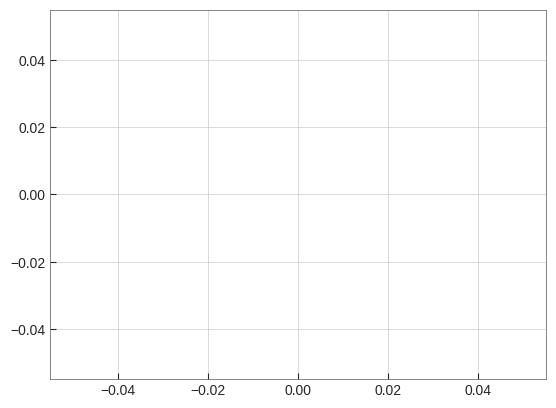

ValueError: Error measuring {\sffamily\fontsize{8.000000}{9.600000}\selectfont\catcode`\^=\active\def^{\ifmmode\sp\else\^{}\fi}\catcode`\%=\active\def%{\%}0.03}
LaTeX Output:
! Interruption.
<*> 
    {\catcode`\^=\active\catcode`\%=\active\sbox0{{\sffamily\fontsize{8.0000...
!  ==> Fatal error occurred, no output PDF file produced!
Transcript written on texput.log.


<Figure size 806.4x604.8 with 4 Axes>

In [ ]:
global_setup()
fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=True)
axes = []

distances = sorted(data_mean['distance'].unique())
cols = 2
rows = int(np.ceil(len(distances)/cols))

for idx, distance in enumerate(distances):
    ax = fig.add_subplot(rows, cols, idx+1, projection='3d')
    axes.append(ax)
    df_d = data_mean[data_mean['distance'] == distance]
    for decoder in df_d['decoder'].unique():
        df_dec = df_d[df_d['decoder']==decoder]
        x = [1.0/val if not np.isnan(val) else 0 for val in df_dec['N'].values]
        y = df_dec['p'].values
        z = df_dec['l'].values
        colors = decoder_colors(decoder)
        color = colors[distance % len(colors)]
        ax.scatter(x, y, z, label=label(decoder), s=20, c=color)
    ax.set_xlabel('1/N')
    ax.set_ylabel('p')
    ax.set_zlabel('l')
    ax.set_title(f"d={distance}")

#fig.suptitle("Logical error rate vs p and 1/N (by distance)", fontsize=16)
# create a single legend outside
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')
plt.tight_layout()
plt.savefig("../paper/figures/logical_vs_p_and_idlingtimconstant_plot.pdf")
fig

In [7]:
def compute_thresholds(merged: pd.DataFrame, tol=1e-12):
    thresholds = []
    for invN, group in merged.groupby('inv_N'):
        group = group.sort_values('p')
        p_vals = group['p'].values
        y_vals = group['rel_diff'].values

        # Find roots of function
        for i in range(len(y_vals) - 1):
            if y_vals[i] * y_vals[i + 1] < 0:
                # Linear interpolation to find root
                p1, p2 = p_vals[i], p_vals[i + 1]
                y1, y2 = y_vals[i], y_vals[i + 1]
                p_thresh = p1 - y1 * (p2 - p1) / (y2 - y1)
                thresholds.append((invN, p_thresh))
                break

    return thresholds

def compute_thresholds_by_roots(merged: pd.DataFrame):
    thresholds = []
    for invN, group in merged.groupby('inv_N'):
        group = group.sort_values('p')
        p_vals = group['p'].values
        y_vals = group['rel_diff'].values

        # sort by p_vals
        sorted_indices = np.argsort(p_vals)
        p_vals = p_vals[sorted_indices]
        y_vals = y_vals[sorted_indices]
        
        #print(f"Computing thresholds for invN={invN}, len(p_vals)={len(p_vals)}")
        
        p_thresh = None
        for i in range(len(y_vals) - 2, 0, -1):
            if y_vals[i] * y_vals[i + 1] < 0:
                # Linear interpolation to find root
                p1, p2 = p_vals[i], p_vals[i + 1]
                y1, y2 = y_vals[i], y_vals[i + 1]
                p_thresh = p1 - y1 * (p2 - p1) / (y2 - y1)
                break
        if not p_thresh:
            # No root found, set to NaN
            p_thresh = np.nan

        thresholds.append((invN, p_thresh))
    

    return thresholds

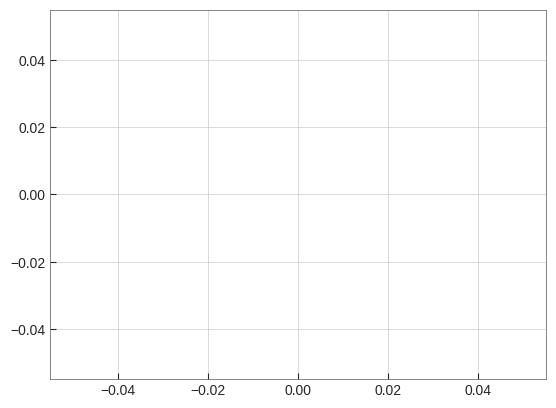

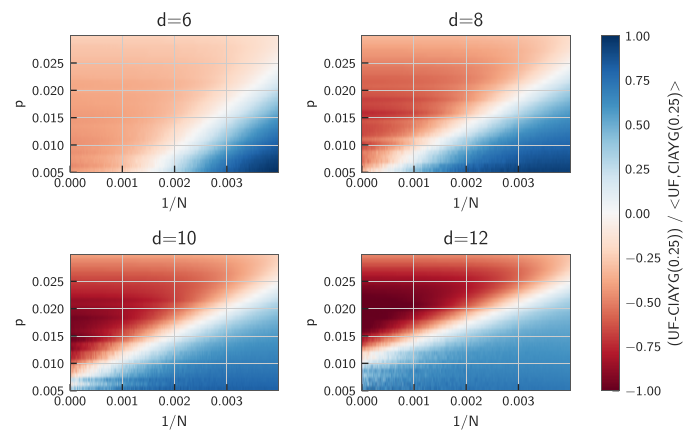

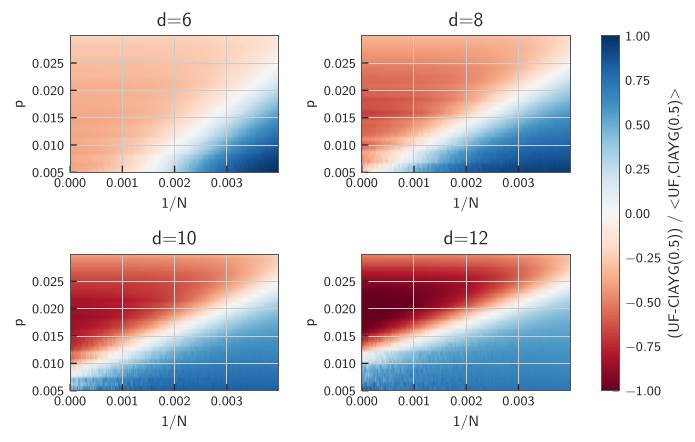

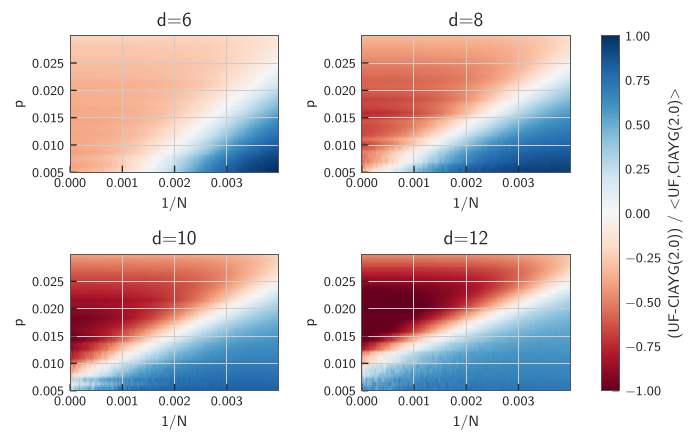

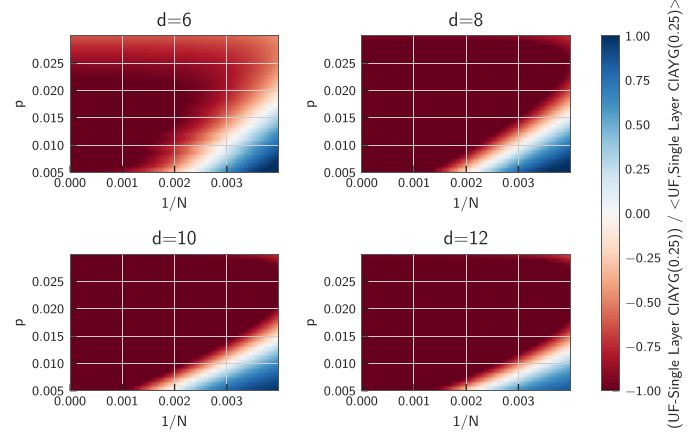

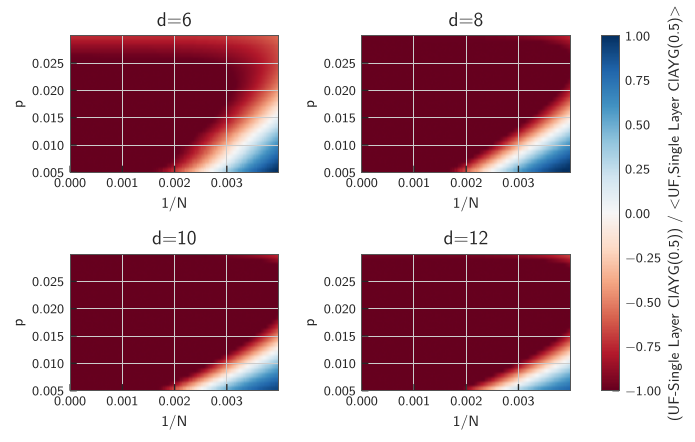

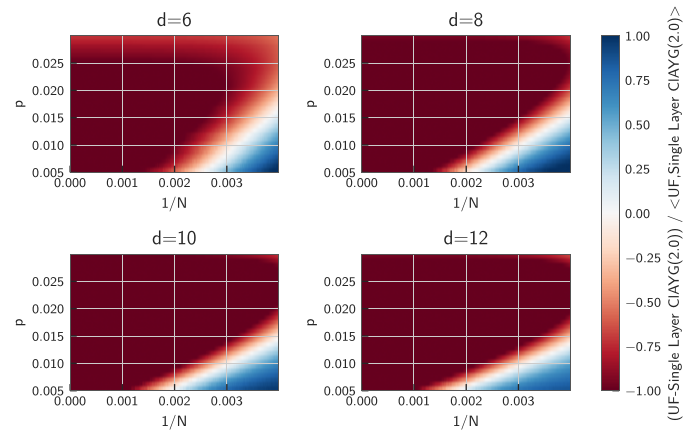

In [8]:
from scipy.interpolate import griddata

display_thresholds = False

decoder_a = 'uf'
clayg_alternatives = [
    'clayg_lifetime_0.25',
    'clayg_lifetime_0.5',
    'clayg_lifetime_2.0',
    'sl_clayg_lifetime_0.25',
    'sl_clayg_lifetime_0.5',
    'sl_clayg_lifetime_2.0',
]
inv_N_range = (0.0, 0.004)  
p_range = (0.005, 0.1)

data_mean = data.results
data_mean = data_mean[data_mean["distance"].isin([6,8,10,12])]
distances = sorted(data_mean['distance'].unique())

for decoder_b in clayg_alternatives:
    global_setup()
    fig = plot_setup(aspect_ratio=4/7, width_ratio=1.0, wide=True)
    axes = []
    cols = 2
    cols = min(cols, len(distances))
    rows = int(np.ceil(len(distances)/cols))

    norm = Normalize(vmin=-1, vmax=1)
    cmap = plt.get_cmap('RdBu')

    for idx, distance in enumerate(distances):
        ax = fig.add_subplot(rows, cols, idx+1)
        axes.append(ax)
        df_d = data_mean[data_mean['distance']==distance]
        df_a = df_d[df_d['decoder']==decoder_a]
        df_b = df_d[df_d['decoder']==decoder_b]
        if df_a.empty or df_b.empty:
            continue
        
        merged = pd.merge(df_a, df_b, on=['p','N'], suffixes=('_a','_b'))
        merged['inv_N'] = 1/merged['N']
        merged = merged.fillna({'inv_N': 0})
        merged = merged[(merged['inv_N'] >= inv_N_range[0]) & (merged['inv_N'] <= inv_N_range[1])]
        merged = merged[(merged['p'] >= p_range[0]) & (merged['p'] <= p_range[1])]
        merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))
        
        pivot = merged.pivot_table(index='p', columns='inv_N', values='rel_diff')
        # smoot out pivot table in 2d using griddata
        pivot = pivot.sort_index()

        im = ax.imshow(pivot.values, origin='lower', aspect='auto', cmap=cmap, norm =norm,
                        extent=[pivot.columns.min(), pivot.columns.max(), pivot.index.min(), pivot.index.max()])
        ax.set_title(f"d={distance}")
        ax.set_xlabel('1/N')
        ax.set_ylabel('p')
        
        compute_thresholds(merged)
        
        # Thresholds
        if display_thresholds:
            thresholds = compute_thresholds_by_roots(merged)
            if thresholds is not None:
                thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
                x = thresholds[:,0]
                y = thresholds[:,1]
                y_smooth = uniform_filter1d(y, size=20)
                # Print relative difference for each point
                rel_diffs = []
                for invN, p_thresh in zip(x, y):
                    rel_diff_row = merged[(merged['inv_N'] == invN) & (np.isclose(merged['p'], p_thresh, atol=1e-3))]
                    if not rel_diff_row.empty:
                        rel_diff = rel_diff_row['rel_diff'].values[0]
                    else:
                        rel_diff = np.nan
                    rel_diffs.append(rel_diff)
                ax.plot(x, y, color='grey', linestyle='--', alpha=0.3)
                ax.plot(x, y_smooth, color='grey', linewidth=2)

    plt.subplots_adjust(hspace=.6, wspace=0.4)  # Increase to add more space
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes)
    decoder_a_name, decoder_b_name = decoder_name(decoder_a), decoder_name(decoder_b)
    cbar.set_label(f"({decoder_a_name}-{decoder_b_name}) / <{decoder_a_name},{decoder_b_name}>")
    plt.savefig(f"../paper/figures/idling_threshold_plots/{decoder_a_name}_vs_{decoder_b_name}.pdf")
    
    fig

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

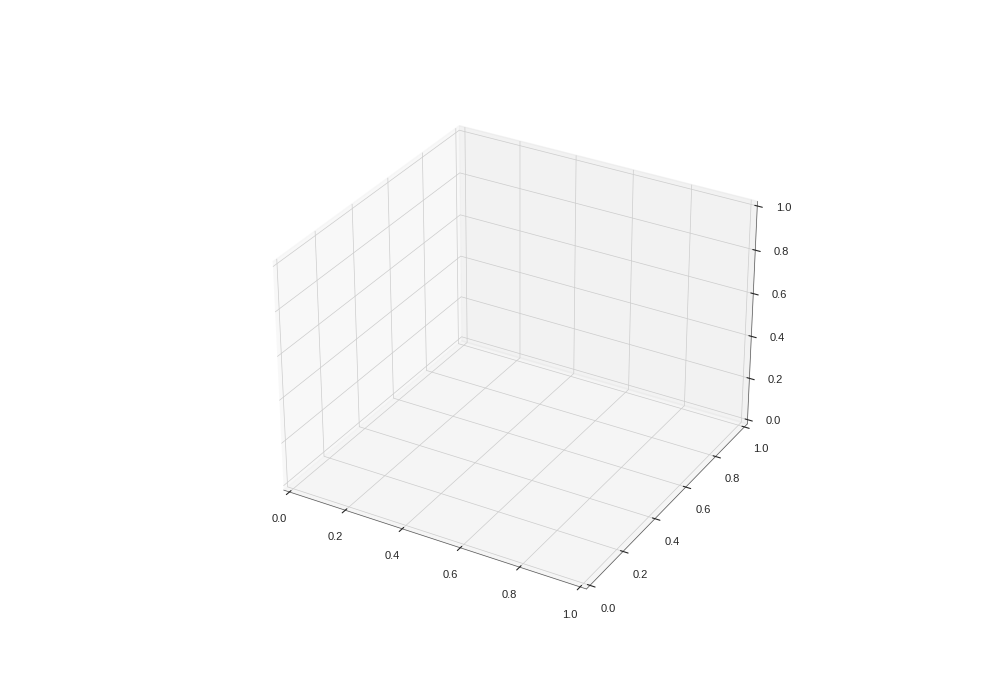

In [22]:
from mpl_toolkits.mplot3d import Axes3D  # needed for 3D plotting
from matplotlib import cm
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
%matplotlib widget
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

decoder_a, decoder_b = 'uf','clayg'
distance = 6

data_mean = data.results[data.results['distance'] == distance]
data_mean = data_mean[1/data_mean['N'] <= 0.0025]

df_a = data_mean[data_mean['decoder']==decoder_a]
df_b = data_mean[data_mean['decoder']==decoder_b]

merged = pd.merge(df_a, df_b, on=['p','N'], suffixes=('_a','_b'))
merged['inv_N'] = 1/merged['N']
merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))

# Pivot to get 2D grid for X, Y, Z
pivot = merged.pivot_table(index='p', columns='inv_N', values='rel_diff')
X, Y = np.meshgrid(pivot.columns.values, pivot.index.values)
Z = pivot.values

# Plot surface
surf = ax.plot_surface(X, Y, Z, cmap='RdBu', vmin=-1, vmax=1, linewidth=0, antialiased=True)

# Plot where surface crosses Z=0
thresholds = compute_thresholds(merged)
if thresholds is not None:
    thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
    x = thresholds[:,0]
    y = thresholds[:,1]
    y_smooth = uniform_filter1d(y, size=20)
    ax.plot(x, y_smooth, zs=0, zdir='z', color='black', linewidth=2)

ax.set_xlabel('1/N')
ax.set_ylabel('p')
ax.set_zlabel(f'Relative performance ({decoder_a}-{decoder_b})')

fig.colorbar(surf, shrink=0.5, aspect=10)

# show in interactive window
plt.show()

In [36]:
# get relative difference at 1/N = 0.002 and p = 0.022 and distance = 10
inv_N_target = 0.002
p_target     = 0.022
distance     = 10
df_d = data_mean[data_mean['distance']==distance]
df_a = df_d[df_d['decoder']==decoder_a]
df_b = df_d[df_d['decoder']==decoder_b]
merged = pd.merge(df_a, df_b, on=['p','N'], suffixes=('_a','_b'))
merged['inv_N'] = 1/merged['N']
merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))
row = merged[(np.isclose(merged['inv_N'], inv_N_target, atol=1e-4)) & (np.isclose(merged['p'], p_target, atol=1e-4))]
if not row.empty:
    rel_diff = row['rel_diff'].values[0]
    print(f"At distance={distance}, 1/N={inv_N_target}, p={p_target}, relative difference between {decoder_a} and {decoder_b} is {rel_diff:.4f}")

At distance=10, 1/N=0.002, p=0.022, relative difference between uf and clayg_lifetime_2.0 is 0.2822


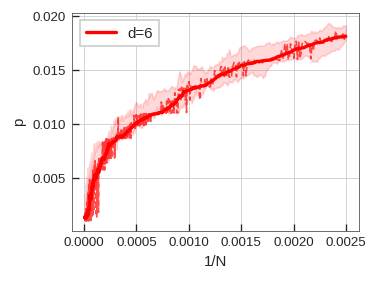

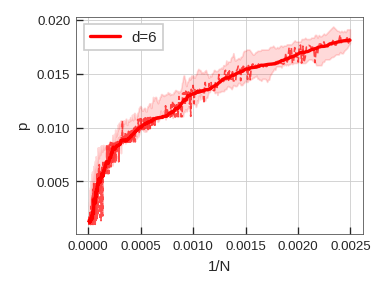

In [23]:
decoder_a, decoder_b = 'uf','clayg_lifetime_2.0'
eps = 0.05

df_a = data_mean[data_mean['decoder']==decoder_a]
df_b = data_mean[data_mean['decoder']==decoder_b]
merged = pd.merge(df_a, df_b, on=['distance','p','N'], suffixes=('_a','_b'))
merged['inv_N'] = 1/merged['N']
merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))

distances = sorted(merged['distance'].unique())
colors = ["r","g","b","m","c"]

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=False)
ax = fig.add_subplot(1, 1, 1)

for i,d in enumerate(distances):
    df_d = merged[merged['distance']==d]
    color = colors[i % len(colors)]
    
    # near-zero band
    band_points = []
    for invN, group in df_d.groupby('inv_N'):
        group = group.sort_values('p')
        near = group[np.abs(group['rel_diff']) < eps]
        if not near.empty:
            band_points.append((invN, near['p'].min(), near['p'].max()))
    if band_points:
        band_points = np.array(sorted(band_points, key=lambda x: x[0]))
        x = band_points[:,0]
        y_low = uniform_filter1d(band_points[:,1], size=5)
        y_high = uniform_filter1d(band_points[:,2], size=5)
        ax.fill_between(x, y_low, y_high, color=color, alpha=0.15)
    
    # Threshold lines
    thresholds =  compute_thresholds(df_d)
    if thresholds is not None:
        thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
        x = thresholds[:,0]
        y = thresholds[:,1]
        y_smooth = uniform_filter1d(y, size=20)
        ax.plot(x, y, color=color, linestyle='--', alpha=0.7)
        ax.plot(x, y_smooth, color=color, linewidth=2, label=f"d={d}")

ax.set_xlabel('1/N')
ax.set_ylabel('p')
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.savefig("../paper/figures/idling_threshold_comparison_plot.pdf")

fig

/tmp/ipykernel_81688/492878438.py:7: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  steps = data.steps[data.steps['occurences']>=1000].groupby(['decoder', 'distance', 'p']).apply(lambda x: x.set_index('value')['occurences'].to_dict()).to_dict()


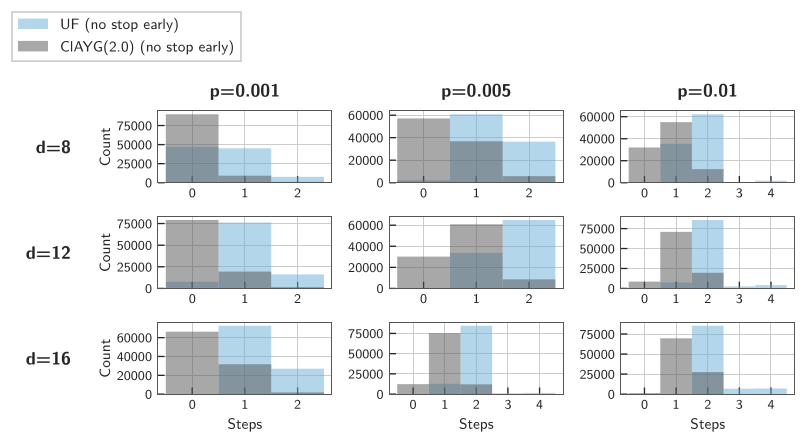

In [ ]:
base_dirs = [
    "../data/ccluster/PAPER/steps_all/",
]

data = collect_data(base_dirs, [])

steps = data.steps[data.steps['occurences']>=1000].groupby(['decoder', 'distance', 'p']).apply(lambda x: x.set_index('value')['occurences'].to_dict()).to_dict()

selected_decoders=['uf_no_stop_early', 'clayg_no_stop_early_lifetime_2.0']
selected_distances=[8,12,16]
selected_ps=[0.001, 0.005, 0.01]

all_keys = list(steps.keys())
decoders = selected_decoders if selected_decoders else sorted({d for d, _, _ in all_keys})
distances = selected_distances if selected_distances else sorted({dist for _, dist, _ in all_keys})

all_ps = sorted({p for _, _, p in all_keys})
ps_to_plot = selected_ps if selected_ps else all_ps

n_rows = len(distances)
n_cols = len(ps_to_plot)

# Use plot_setup to create figure with correct aspect ratio
fig = plot_setup(aspect_ratio=0.5*n_rows/n_cols, width_ratio=1.0, wide=True)

axes = []
for i in range(n_rows):
    row_axes = []
    for j in range(n_cols):
        ax = fig.add_subplot(n_rows, n_cols, i*n_cols + j + 1)
        row_axes.append(ax)
    axes.append(row_axes)

for i, distance in enumerate(distances):
    for j, p in enumerate(ps_to_plot):
        ax = axes[i][j]
        for decoder in decoders:
            key = (decoder, distance, p)
            if key not in steps:
                continue
            counts = steps[key]
            x = []
            for step_val, count in counts.items():
                x.extend([step_val]*count)
            if not x:
                continue
            min_val, max_val = min(x), max(x)
            bins = np.arange(min_val, max_val + 2) - 0.5  # integer bins centered on step values

            color = decoder_colors(decoder)[0]
            ax.hist(x, bins=bins, alpha=0.5, color=color, label=label(decoder), align='mid')
        
        if j == 0:
            ax.set_ylabel(f"Count")
        if i == n_rows-1:
            ax.set_xlabel("Steps")
        ax.grid(True)
        
        ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))
        ax.yaxis.set_major_locator(plt.MaxNLocator(integer=True, nbins=4))

# Add ps to top of each column
for j, p in enumerate(ps_to_plot):
    axes[0][j].text(0.5, 1.15, f"p={p}", transform=axes[0][j].transAxes,
                    fontsize='large', fontweight='bold', va='bottom', ha='center')

# Add distances to left side of each row
for i, distance in enumerate(distances):
    axes[i][0].text(-0.5, 0.5, f"d={distance}", transform=axes[i][0].transAxes,
                    fontsize='large', fontweight='bold', va='center', ha='right')

handles, labels = axes[0][0].get_legend_handles_labels()
if handles:
    fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(0, 1.1))

fig.tight_layout(rect=[0,0,1,0.95])

plt.savefig("../paper/figures/steps_histograms.pdf")

fig

/tmp/ipykernel_161534/331850079.py:18: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(weighted_median)
/tmp/ipykernel_161534/331850079.py:40: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: np.average(x['value'], weights=x['occurences']))


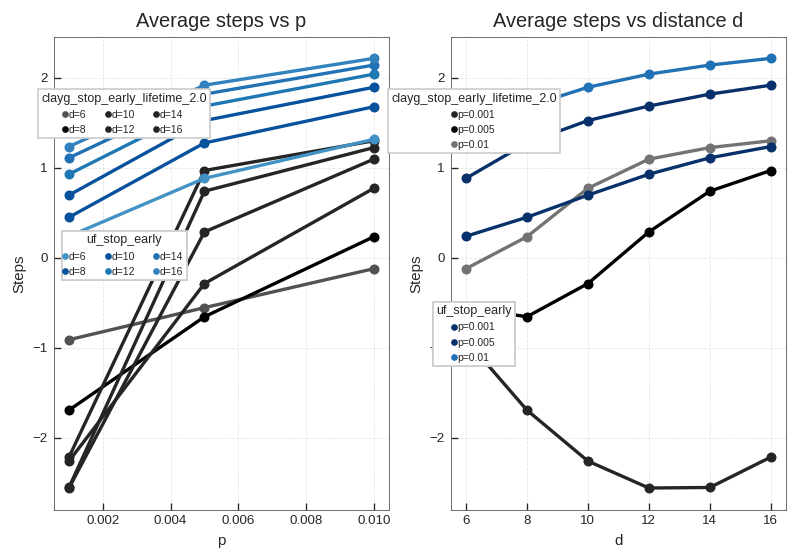

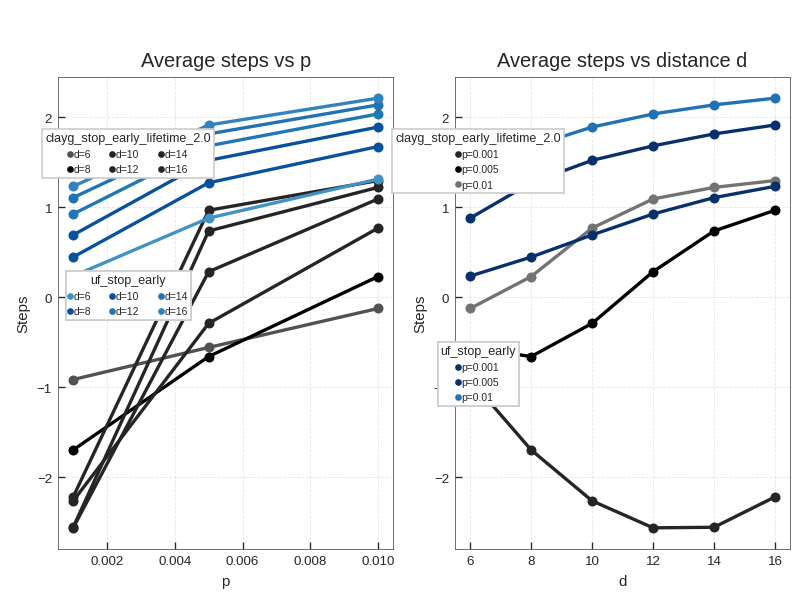

In [ ]:
base_dirs = [
    "../data/ccluster/PAPER/steps_all/",
]

data = collect_data(base_dirs, [])

data.steps = data.steps[data.steps['decoder'].isin(['uf_stop_early', 'clayg_stop_early_lifetime_2.0'])]

def weighted_median(df):
    expanded = []
    for value, count in zip(df['value'], df['occurences']):
        expanded.extend([value] * count)
    return np.median(expanded)

median_steps = (
    data.steps
    .groupby(['decoder', 'distance', 'p'])
    .apply(weighted_median)
    .reset_index(name='avg_steps')
)

median_steps_by_d = (
    median_steps
    .pivot_table(index=['decoder', 'p'], columns='distance', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

median_steps_by_p = (
    median_steps
    .pivot_table(index=['decoder', 'distance'], columns='p', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)


avg_steps = (
    data.steps
    .groupby(['decoder', 'distance', 'p'])
    .apply(lambda x: np.average(x['value'], weights=x['occurences']))
    .reset_index(name='avg_steps')
)

average_steps_by_d = (
    avg_steps
    .pivot_table(index=['decoder', 'p'], columns='distance', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

average_steps_by_p = (
    avg_steps
    .pivot_table(index=['decoder', 'distance'], columns='p', values='avg_steps')
    .apply(lambda row: row.dropna().to_dict(), axis=1)
    .to_dict()
)

from matplotlib.lines import Line2D

include_medians = False
if include_medians:
    plots_data = [
        (average_steps_by_p, "p", "d"),
        (median_steps_by_p, "p", "d"),
        (average_steps_by_d, "d", "p"),
        (median_steps_by_d, "d", "p"),
    ]
    titles = [
    "Average steps vs p",
    "Median steps vs p",
    "Average steps vs distance d",
        "Median steps vs distance d",
    ]
    cols = 2
else:
    plots_data = [
        (average_steps_by_p, "p", "d"),
        (average_steps_by_d, "d", "p"),
    ]
    titles = [
        "Average steps vs p",
        "Average steps vs distance d",
    ]
    cols = 1

fig = plot_setup(aspect_ratio=0.75, width_ratio=1.0, wide=True)
axes = fig.subplots(cols, len(plots_data)//cols)
axes = axes.flatten()



for ax, (data_dict, x_label, legend_label), title in zip(axes, plots_data, titles):
    grouped_lines = {}

    for (decoder, key), values in data_dict.items():
        colors = decoder_colors(decoder)
        label = label(decoder)
        x = np.array(sorted(values.keys()))
        y = np.array([values[k] for k in x])

        color = colors[int(np.abs(hash(str(key))) % len(colors))]
        line, = ax.plot(
            x, y,
            marker='o',
            linestyle='-',
            color=color,
            linewidth=2,
            markersize=5,
        )
        grouped_lines.setdefault(label, []).append((line, key))

    ax.set_xlabel(x_label)
    ax.set_ylabel("Steps")
    ax.set_title(title)
    ax.grid(True, linestyle='--', alpha=0.5)

    # === One small legend per decoder ===
    # Place them stacked vertically, but entries for each decoder side-by-side
    legend_y = 0.9  # start just above the plot
    for dec_i, (dec_name, entries) in enumerate(grouped_lines.items()):
        legend_elements = [
            Line2D([0], [0], color=line.get_color(), lw=2, marker='o', label=f"{legend_label}={key}")
            for line, key in entries
        ]
        cols = len(legend_elements)//2
        rows = len(legend_elements)//cols
        leg = ax.legend(
            handles=legend_elements,
            title=dec_name,
            loc='upper center',
            bbox_to_anchor=(0.07*cols, legend_y - 0.15 *(rows)* dec_i),
            frameon=True,
            fontsize='x-small',
            handlelength=0.1,
            handletextpad=0.3,
            borderpad=0.3,
            ncol=cols,  # side by side
            title_fontsize='small',
        )
        ax.add_artist(leg)

fig.tight_layout(rect=[0, 0, 1, 0.94])

plt.savefig("../paper/figures/avg_median_steps.pdf")
fig

/tmp/ipykernel_173905/1691313410.py:16: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data_mean = data.results.groupby(['decoder', 'distance', 'N', 'p'], dropna=False).apply(
/tmp/ipykernel_173905/1691313410.py:53: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(pivot.values, origin='lower', aspect='auto', cmap=cmap, norm =norm,
/tmp/ipykernel_173905/1691313410.py:53: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(pivot.values, origin='lower', aspect='auto', cmap=cmap, norm =norm,
/tmp/ipykernel_173905/1691313410.py:53: UserWarning: 

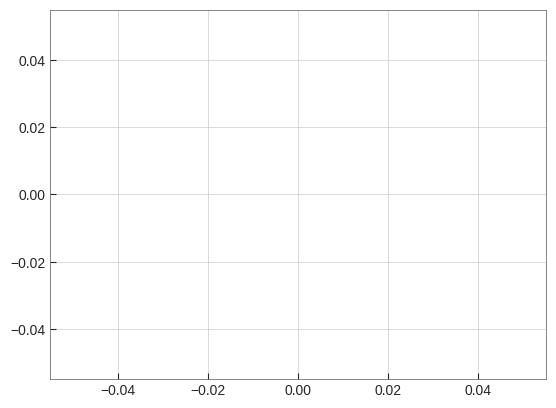

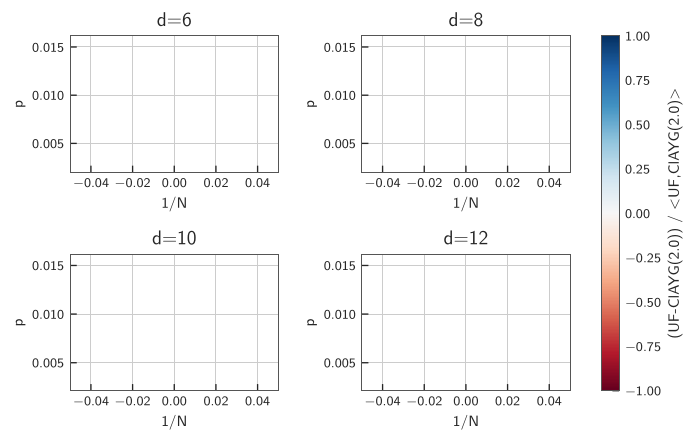

In [ ]:
base_dirs = [
    "../data/ccluster/PAPER/idling_check",
]

data = collect_data(base_dirs, [])

display_thresholds = False

decoder_a = 'uf'
clayg_alternatives = [
    'clayg_lifetime_2.0'
]
inv_N_range = (0.0, 2e-6)  
p_range = (0.000, 0.1)

data_mean = data.results.groupby(['decoder', 'distance', 'N', 'p'], dropna=False).apply(
    lambda x: np.average(x['l'], weights=x['n'])
).reset_index(name='l')
data_mean = data_mean[data_mean["distance"].isin([6,8,10,12])]
distances = sorted(data_mean['distance'].unique())

for decoder_b in clayg_alternatives:
    global_setup()
    fig = plot_setup(aspect_ratio=4/7, width_ratio=1.0, wide=True)
    axes = []
    cols = 2
    cols = min(cols, len(distances))
    rows = int(np.ceil(len(distances)/cols))

    norm = Normalize(vmin=-1, vmax=1)
    cmap = plt.get_cmap('RdBu')

    for idx, distance in enumerate(distances):
        ax = fig.add_subplot(rows, cols, idx+1)
        axes.append(ax)
        df_d = data_mean[data_mean['distance']==distance]
        df_a = df_d[df_d['decoder']==decoder_a]
        df_b = df_d[df_d['decoder']==decoder_b]
        if df_a.empty or df_b.empty:
            continue
        
        merged = pd.merge(df_a, df_b, on=['p','N'], suffixes=('_a','_b'))
        merged['inv_N'] = 1/merged['N']
        merged = merged.fillna({'inv_N': 0})
        merged = merged[(merged['inv_N'] >= inv_N_range[0]) & (merged['inv_N'] <= inv_N_range[1])]
        merged = merged[(merged['p'] >= p_range[0]) & (merged['p'] <= p_range[1])]
        merged['rel_diff'] = (merged['l_a'] - merged['l_b']) / (0.5*(merged['l_a']+merged['l_b']))
        
        pivot = merged.pivot_table(index='p', columns='inv_N', values='rel_diff')
        # smoot out pivot table in 2d using griddata
        pivot = pivot.sort_index()

        im = ax.imshow(pivot.values, origin='lower', aspect='auto', cmap=cmap, norm =norm,
                        extent=[pivot.columns.min(), pivot.columns.max(), pivot.index.min(), pivot.index.max()])
        ax.set_title(f"d={distance}")
        ax.set_xlabel('1/N')
        ax.set_ylabel('p')
        
        compute_thresholds(merged)
        
        # Thresholds
        if display_thresholds:
            thresholds = compute_thresholds_by_roots(merged)
            if thresholds is not None:
                thresholds = np.array(sorted(thresholds, key=lambda t: t[0]))
                x = thresholds[:,0]
                y = thresholds[:,1]
                y_smooth = uniform_filter1d(y, size=20)
                # Print relative difference for each point
                rel_diffs = []
                for invN, p_thresh in zip(x, y):
                    rel_diff_row = merged[(merged['inv_N'] == invN) & (np.isclose(merged['p'], p_thresh, atol=1e-3))]
                    if not rel_diff_row.empty:
                        rel_diff = rel_diff_row['rel_diff'].values[0]
                    else:
                        rel_diff = np.nan
                    rel_diffs.append(rel_diff)
                ax.plot(x, y, color='grey', linestyle='--', alpha=0.3)
                ax.plot(x, y_smooth, color='grey', linewidth=2)

    plt.subplots_adjust(hspace=.6, wspace=0.4)  # Increase to add more space
    cbar = fig.colorbar(cm.ScalarMappable(norm=norm, cmap=cmap), ax=axes)
    decoder_a_name, decoder_b_name = decoder_name(decoder_a), decoder_name(decoder_b)
    cbar.set_label(f"({decoder_a_name}-{decoder_b_name}) / <{decoder_a_name},{decoder_b_name}>")
    plt.savefig(f"../paper/figures/idling_threshold_plots/{decoder_a_name}_vs_{decoder_b_name}.pdf")
    
    fig